In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from thesis_tools.utils.data import *
from thesis_tools.models.frequentist import *

In [19]:
df = read_panel_data(observations_threshold=30)

In [20]:
df

,group,level_1,year,gdp_pc,MSCI,SPX,net_worth,N_net_worth,log_change_gdp_pc,log_change_MSCI,log_change_SPX
0,Alps,9001,2014,70059.493969,1598.500000,1782.589966,"[12.0, 10.5, 9.2, 8.1, 7.2, 6.3, 5.5, 4.8, 4.7...",31,NaN,NaN,NaN
1,Alps,10490,2015,63807.216418,1677.500000,1994.989990,"[10.8, 8.8, 8.4, 7.9, 6.6, 6.1, 6.1, 5.5, 5.1,...",37,-0.093479,0.048239,0.112572
2,Alps,12090,2016,63585.313772,1562.199951,1940.239990,"[13.2, 8.6, 8.4, 8.0, 6.8, 6.1, 5.0, 4.5, 3.8,...",40,-0.003484,-0.071210,-0.027827
3,Alps,13773,2017,64747.256136,1805.500000,2278.870117,"[13.4, 8.6, 7.5, 7.2, 5.5, 5.3, 5.1, 4.8, 4.7,...",46,0.018109,0.144743,0.160868
4,Alps,15589,2018,68280.330363,2171.500000,2823.810059,"[23.0, 9.3, 8.9, 8.1, 7.1, 6.5, 5.7, 5.5, 5.5,...",45,0.053130,0.184581,0.214407
...,...,...,...,...,...,...,...,...,...,...,...
215,U.S.,17579,2019,65120.394663,2029.599976,2704.100098,"[131.0, 96.5, 82.5, 62.5, 62.3, 55.5, 50.8, 50...",607,0.035912,-0.067579,-0.043318
216,U.S.,19550,2020,63528.634303,2342.399902,3225.520020,"[113.0, 98.0, 67.5, 59.0, 54.7, 54.6, 54.4, 54...",615,-0.024747,0.143337,0.176325
217,U.S.,21499,2021,70219.472454,2661.699951,3714.239990,"[177.0, 151.0, 124.0, 97.0, 96.0, 93.0, 91.5, ...",724,0.100135,0.127789,0.141080
218,U.S.,24074,2022,76329.582265,3052.500000,4515.549805,"[219.0, 171.0, 129.0, 118.0, 111.0, 107.0, 106...",735,0.083435,0.136996,0.195353


In [5]:
df['weibull_gamma'] = np.nan
df['gpd_gamma'] = np.nan
df['pareto_alpha'] = np.nan
df['weibull_alpha'] = np.nan
df['gpd_alpha'] = np.nan

In [6]:
# iterate over the rows
for i, row in df.iterrows():
    # get the data
    data = np.array(row['net_worth'])
    pareto_alpha, _ = Pareto().fit(data)
    weibull_gamma, weibull_alpha = Weibull().fit(data, given_gamma=0.28)
    gpd_gamma, gpd_alpha, _ = GeneralisedPareto().fit(data, given_gamma=0.5)
    # store the results
    df.loc[i, 'pareto_alpha'] = pareto_alpha
    df.loc[i, 'weibull_gamma'] = weibull_gamma
    df.loc[i, 'weibull_alpha'] = weibull_alpha
    df.loc[i, 'gpd_gamma'] = gpd_gamma
    df.loc[i, 'gpd_alpha'] = gpd_alpha


Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.5 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.5 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.5 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.5 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.5 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter set to: 0.5 using given_gamma.
Gamma parameter set to: None using given_gamma to estimate alpha using Teulings & Toussaint (2023).
Gamma parameter se

In [7]:
# count observations per group
df.groupby('group').count()

,level_1,year,gdp_pc,MSCI,SPX,net_worth,N_net_worth,log_change_gdp_pc,log_change_MSCI,log_change_SPX,weibull_gamma,gpd_gamma,pareto_alpha,weibull_alpha,gpd_alpha
group,,,,,,,,,,,,,,,
Alps,17,17,17,17,17,17,17,16,16,16,17,17,17,17,17
Asian Islands,17,17,17,17,17,17,17,16,16,16,17,17,17,17,17
Australia,14,14,14,14,14,14,14,13,13,13,14,14,14,14,14
Brazil,18,18,18,18,18,18,18,17,17,17,18,18,18,18,18
British Islands,23,23,23,23,23,23,23,22,22,22,23,23,23,23,23
Canada,21,21,21,21,21,21,21,20,20,20,21,21,21,21,21
China,20,20,20,20,20,20,20,19,19,19,20,20,20,20,20
France,19,19,19,19,19,19,19,18,18,18,19,19,19,19,19
Germany,23,23,23,23,23,23,23,22,22,22,23,23,23,23,23


In [8]:
import copy
df_group = df[df['group'] == 'Southeast Asia']
df_group = copy.deepcopy(df_group)

In [9]:
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

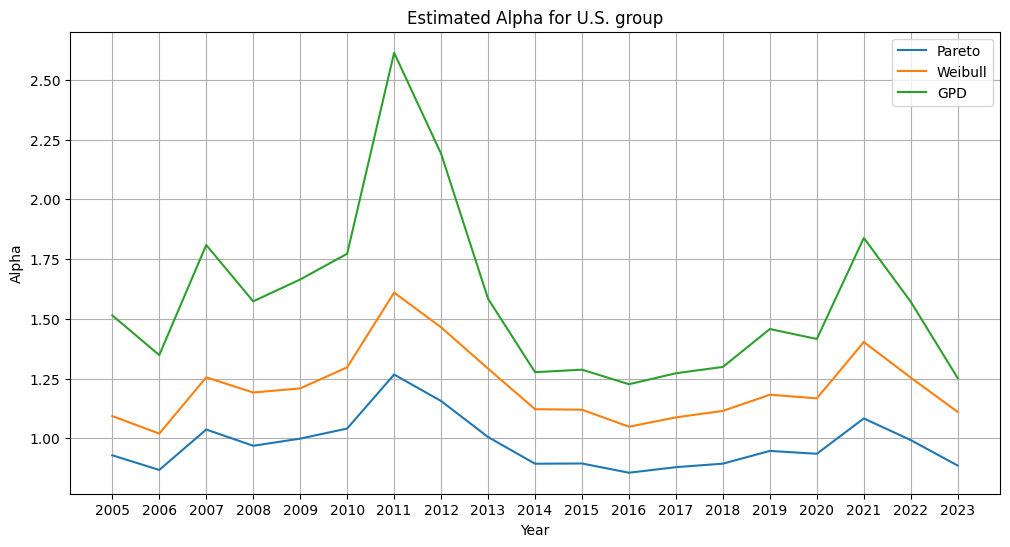

In [10]:
# Plot the estimated alpha pareto, weibull and gpd, as a line plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(df_group['year'], df_group['pareto_alpha'], label='Pareto')
ax.plot(df_group['year'], df_group['weibull_alpha'], label='Weibull')
ax.plot(df_group['year'], df_group['gpd_alpha'], label='GPD')
ax.set_xlabel('Year')
ax.set_ylabel('Alpha')
ax.set_title('Estimated Alpha for U.S. group')
ax.grid(True)
ax.set_xticks(df_group['year'])
ax.legend()
plt.show()

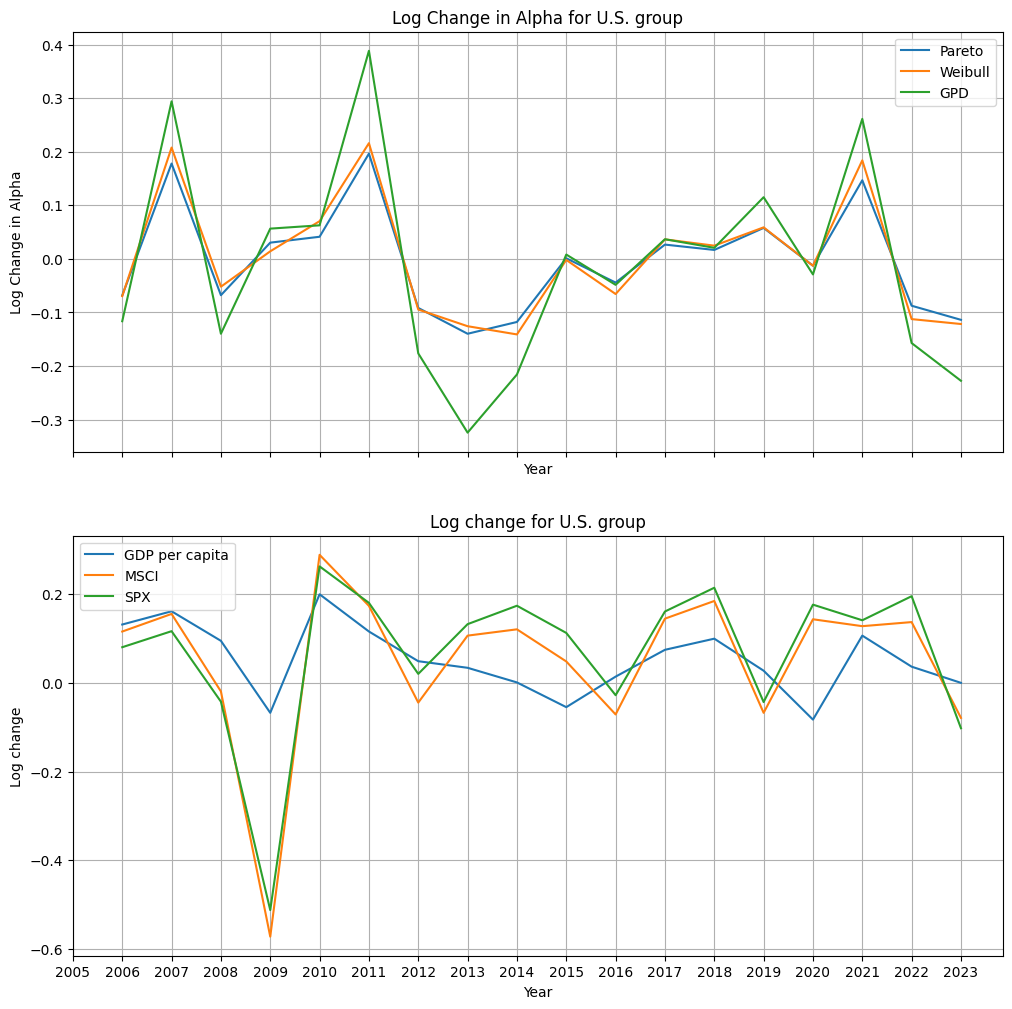

In [11]:
# combine the above two plots into two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax[0].plot(df_group['year'], df_group['log_change_alpha_pareto'], label='Pareto')
ax[0].plot(df_group['year'], df_group['log_change_alpha_weibull'], label='Weibull')
ax[0].plot(df_group['year'], df_group['log_change_alpha_gpd'], label='GPD')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Log Change in Alpha')
ax[0].set_title('Log Change in Alpha for U.S. group')
ax[0].grid(True)
ax[0].set_xticks(df_group['year'])
ax[0].legend()

ax[1].plot(df_group['year'], df_group['log_change_gdp_pc'], label='GDP per capita')
ax[1].plot(df_group['year'], df_group['log_change_MSCI'], label='MSCI')
ax[1].plot(df_group['year'], df_group['log_change_SPX'], label='SPX')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Log change')
ax[1].set_title('Log change for U.S. group')
ax[1].grid(True)
ax[1].set_xticks(df_group['year'])
ax[1].legend()
plt.show()

In [12]:
import statsmodels.api as sm
import pandas as pd

# Assuming df_group is your DataFrame

# Define the dependent variable (y) and independent variables (X)
y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.170
Model:                                 OLS   Adj. R-squared:                  0.059
Method:                      Least Squares   F-statistic:                     1.531
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.248
Time:                             16:28:27   Log-Likelihood:                 17.968
No. Observations:                       18   AIC:                            -29.94
Df Residuals:                           15   BIC:                            -27.26
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
groups = df['group'].unique()

In [14]:
groups

array(['Alps', 'Asian Islands', 'Australia', 'Brazil', 'British Islands',
       'Canada', 'China', 'France', 'Germany', 'India', 'Israel + Turkey',
       'Italy', 'Japan', 'Russia', 'Scandinavia', 'South Korea',
       'Southeast Asia', 'U.S.'], dtype=object)

In [15]:
# regression results
results = {}
for group in groups:
    df_group = df[df['group'] == group]
    if len(df_group) <= 3:
        continue
    df_group = copy.deepcopy(df_group)
    df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
    df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
    df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))
    
    # Define the dependent variable (y) and independent variables (X)
    y = df_group['log_change_alpha_gpd']
    X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

    # remove the nans
    X = X.dropna()
    y = y[X.index]

    # Add a constant to the independent variables matrix (X)
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    # get the p values
    p_values = model.pvalues
    R_squared = model.rsquared
    results[group] = {
        'R_squared': R_squared,
        'const_p_value': p_values['const'],
        'log_change_gdp_pc_p_value': p_values['log_change_gdp_pc'],
        'log_change_MSCI_p_value': p_values['log_change_MSCI']
    }
results_df = pd.DataFrame(results).T


In [16]:
results_df

,R_squared,const_p_value,log_change_gdp_pc_p_value,log_change_MSCI_p_value
Alps,0.375430,0.445496,0.370807,0.068811
Asian Islands,0.784473,0.070661,0.350494,0.000032
Australia,0.480826,0.231678,0.015225,0.066057
Brazil,0.103588,0.996820,0.368434,0.557889
British Islands,0.534766,0.748279,0.087424,0.010696
Canada,0.553517,0.244313,0.160822,0.023375
China,0.304162,0.668232,0.861998,0.019620
France,0.325169,0.939391,0.044372,0.567366
Germany,0.755696,0.012887,0.065450,0.000002
India,0.076813,0.332450,0.788429,0.329930
